In [1]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits
import numpy as np
import pandas as pd

from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier

In [2]:
# 様々なランダム値での、それぞれの分類器の正解率
est1 = []
est2 = []

for ran in range(10):
    
    # 様々な分類器のインスタンスを作成（アンサンブル学習の効果を見るため、あえて正解率が悪くなるようなパラメータにしている）
    
    ran_frst_clf = RandomForestClassifier(n_estimators=1, random_state=ran)
    ext_trees_clf = ExtraTreesClassifier(n_estimators=1, random_state=ran)
    # 遅くなるが、predict_probabilityを持たせるためにprobability=True
    svm_clf = SVC(gamma="scale", probability=True, random_state=ran)
    bag_clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators=5, max_samples=100, bootstrap=True, random_state=ran)
    ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=2), n_estimators=40, algorithm="SAMME.R", learning_rate=0.5, random_state=ran)
    # max_iterを増やさないと収束しないエラー出る
    log_clf = LogisticRegression(solver="lbfgs", random_state=ran,max_iter=10000)
    knn_clf = KNeighborsClassifier(n_neighbors=3)
    
    # データ取得
    loaded = load_digits()
    X_train,X_test,y_train,y_test = train_test_split(loaded.data, loaded.target, test_size=0.2, random_state = ran)
  
    # estimators1:弱分類器＋強分類器-----------------------------------------------------------------------------------------
    est1_list = []
    estimators1 = [ran_frst_clf, ext_trees_clf, svm_clf, bag_clf, ada_clf, log_clf,knn_clf]
    for est in estimators1:
        est.fit(X_train, y_train)
    for est in estimators1:
        est1_list.append(round(est.score(X_test, y_test), 3))
    name_est1 = [
        ("ran_frst_clf", ran_frst_clf),
        ("ext_trees_clf", ext_trees_clf),
        ("svm_clf", svm_clf),
        ("bag_clf",bag_clf),
        ("ada_clf",ada_clf),
        ("log_clf",log_clf),
        ("knn_clf",knn_clf),
    ]

    voting_clf1 = VotingClassifier(name_est1)
    voting_clf1.fit(X_train, y_train)
    est1_list.append(round(voting_clf1.score(X_test, y_test),3))
    voting_clf1.voting = "soft"
    est1_list.append(round(voting_clf1.score(X_test, y_test),3))
    est1.append(est1_list)
    
    # estimators2:弱分類器---------------------------------------------------------------------------------------------------
    est2_list = []
    estimators2 = [ran_frst_clf, ext_trees_clf, bag_clf, ada_clf]
    for est in estimators2:
        est.fit(X_train, y_train)
    for est in estimators2:
        est2_list.append(round(est.score(X_test, y_test), 3))
    name_est2 = [
        ("ran_frst_clf", ran_frst_clf),
        ("ext_trees_clf", ext_trees_clf),
        ("bag_clf",bag_clf),
        ("ada_clf",ada_clf),
    ]
    voting_clf2 = VotingClassifier(name_est2)
    voting_clf2.fit(X_train, y_train)
    est2_list.append(round(voting_clf2.score(X_test, y_test),3))
    voting_clf2.voting = "soft"
    est2_list.append(round(voting_clf2.score(X_test, y_test),3))
    est2.append(est2_list)

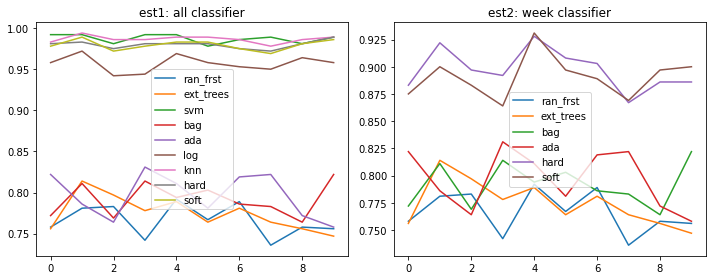

In [3]:
df1 = pd.DataFrame(est1,
                  index=range(10),
                  columns=['ran_frst', 'ext_trees', 'svm' ,'bag' ,'ada' ,'log' ,'knn' ,'hard' ,'soft'])
df2 = pd.DataFrame(est2,
                  index=range(10),
                  columns=['ran_frst', 'ext_trees', 'bag' ,'ada' ,'hard' ,'soft'])

from matplotlib import pyplot as plt
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
ax[0].plot(df1,label=df1.columns)
ax[0].legend(loc = 'center')
ax[0].set_title('est1: all classifier')
ax[1].plot(df2,label=df2.columns)
ax[1].legend(loc = 'center')
ax[1].set_title('est2: week classifier')
fig.tight_layout()